In [1]:
from dask.distributed import Client, progress
dask_client = Client(threads_per_worker=10, n_workers=6)
dask_client

Client Scheduler: tcp://127.0.0.1:42650 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 6 Cores: 60 Memory: 99.69 GB


In [29]:
dask_client.shutdown()

In [2]:
import dask_image.imread
import dask_image.ndfilters
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import dask

# Check dark images (sigmas and average)

In [4]:
dark_path = r'/mnt/nvme_ssd/220307_post_proc/220307_captures/peds/28[1-2[]/*'
dark_images = dask_image.imread.imread(dark_path, arraytype="numpy")
print(dark_images.shape)
avg_dark = np.average(dark_images, axis=0)

(10004, 400, 400)


In [5]:
dark_avg_comptured = avg_dark.compute() # init dark capture from static 10000 frames

In [7]:
first_500 = dark_images[:1500]
first_500_min_back = first_500 - dark_avg_comptured

In [8]:
pixels_500 = first_500_min_back.flatten()

In [9]:
p500 = pixels_500.compute()

In [10]:
print(f'for first 500 black mean {np.average(p500)} and std {np.std(p500)}')

for first 500 black mean 2.3443095684051514 and std 20.419034957885742


# real capture processing

In [27]:
from pathlib import Path
from PIL import Image
import matplotlib.patches as patches


In [12]:
file_path = r'/mnt/nvme_ssd/220307_post_proc/220307_captures/butterfly_only/*/*'

images = dask_image.imread.imread(file_path, arraytype="numpy")

In [18]:
print(images.shape)

(26026, 400, 400)


In [13]:
images_background = images - dark_avg_comptured
images_sum = images_background.sum(axis=0)
# images_thresholded_comptured = images_thresholded.compute()

In [15]:
images_sum_comp = images_sum.compute()

<IPython.core.display.Javascript object>


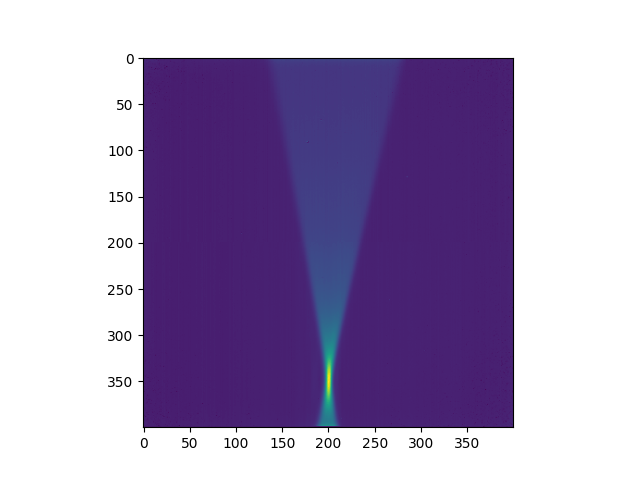

In [24]:
%matplotlib notebook
plt.imshow(images_sum_comp)

In [45]:
np.save('butterfly_summ_26026_frames', images_sum_comp)

<IPython.core.display.Javascript object>


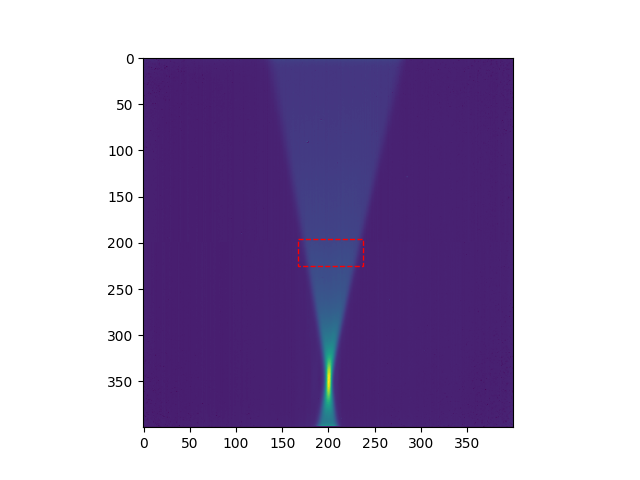

In [43]:
%matplotlib notebook
plt.imshow(images_sum_comp)
axes = plt.gca()
rect = patches.Rectangle((167, 196), 233-163, 196-167, linewidth=1, edgecolor='r', linestyle='--', facecolor='none')
axes.add_patch(rect)


In [44]:
plt.imsave("butterfly_sum_26026_frames_gdm5_area.png",images_sum_comp, dpi=300)


In [19]:
im = Image.fromarray(images_sum_comp)
im.save("butterfly_sum_26026_frames_gdm5_area.tiff")

In [ ]:
%matplotlib notebook
plt.imshow(images_sum_comp)